Random Forest + Explainable AI

Environment für dieses Notebook: `ads-ml-full` (*requirements-py3.11-ads-ml-full.txt*).


## Daten einlesen

In [65]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv")

In [198]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv") 
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


## Trainings- und Testdaten

In [200]:
unlabeled = data[data["Immobilien_Alter"].isna()].copy()
len(unlabeled)

0

In [201]:
labeled = data[data["Immobilien_Alter"].notna()]
len(labeled)

9192

In [202]:
unlabeled = data[data["Year_Built"].isna()].copy()
len(unlabeled)

0

In [203]:
labeled = data[data["Year_Built"].notna()]
len(labeled)

9192

In [204]:
unlabeled = data[data["Lotsize"].isna()].copy()
len(unlabeled)

0

In [205]:
labeled = data[data["Lotsize"].notna()]##
len(labeled)

9192

In [206]:
unlabeled = data[data["Fbath"].isna()].copy()
len(unlabeled)

0

In [207]:
labeled = data[data["Fbath"].notna()]##
len(labeled)

9192

In [208]:
unlabeled = data[data["Style"].isna()].copy()
len(unlabeled)

0

In [209]:
labeled = data[data["Style"].notna()] ##
len(labeled) 

9192

In [223]:
from sklearn.model_selection import train_test_split

y = "Sale_price"
X = labeled.columns.to_list()
X.remove(y)
train_data, test_data = train_test_split(
    labeled, test_size=0.2, random_state=42, stratify=labeled["Immobilien_Alter"]
)

In [232]:
num_features = [ "Fbath", "Lotsize", "Sale_price", "Year_Built", "Immobilien_Alter"] #Fläche pro Bad "Year_Built",
cat_features = ["Premium", "PropType", "District", "District"]

In [233]:
cols_subset_2 = ["Fbath", "Immobilien_Alter", "Lotsize", "PropType"] #"District", Year_Built

In [234]:
print(train_data.columns)


Index(['Unnamed: 0', 'PropType', 'District', 'Style', 'Year_Built', 'Fin_sqft',
       'Fbath', 'Lotsize', 'Sale_date', 'Sale_price', 'Fläche_pro_Bad',
       'Immobilien_Alter', 'Premium'],
      dtype='object')


## Versuch Random Forest



In [235]:
from sklearn import set_config

set_config(transform_output="pandas")

Prep A und B sind ähnlich zu Versuch 2.

In [92]:
'''from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Annahme, dass 'data' Ihr DataFrame ist und korrekt eingelesen wurde
# Bitte überprüfen Sie die Spaltennamen mit data.columns und passen Sie sie entsprechlich an

# Definition der Zielvariable und der Feature-Sets
y = 'Sale_price'
features = ['Year_Built', 'Fbath', 'Lotsize', 'District', 'Style'] # Beispiel-Features

# Trennung in Trainings- und Testdatensätze
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Konfiguration der Datenvorverarbeitungspipelines
# Anpassung auf Basis tatsächlicher Spaltennamen in Ihrem DataFrame
ct = ColumnTransformer(transformers=[
    ('impute', IterativeImputer(random_state=42), ['Year_Built', 'Fbath', 'Lotsize']),
    ('scale', QuantileTransformer(output_distribution='normal'), ['Year_Built', 'Fbath', 'Lotsize']),
    ('one_hot', OneHotEncoder(sparse_output=False), ['District', 'Style'])  # Hier wurde sparse_output=False hinzugefügt
], remainder='passthrough')

# Konfiguration des RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42, min_samples_split=100, min_samples_leaf=50, max_features='auto', max_depth=5)

# Zusammenstellung der Pipeline
pipeline = Pipeline(steps=[('preprocessor', ct), ('regressor', rf_regressor)])

# Anpassung der Pipeline an die Trainingsdaten
# Stellen Sie sicher, dass 'Sale_price' in Ihrem DataFrame vorhanden ist und die Spaltennamen korrekt sind
X_train = train_data[features]
y_train = train_data[y]
pipeline.fit(X_train, y_train)

# Evaluation der Pipeline auf dem Testdatensatz
X_test = test_data[features]
y_test = test_data[y]
score = pipeline.score(X_test, y_test)

print(f'Model score: {score}')'''

"from sklearn.model_selection import train_test_split\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.preprocessing import OneHotEncoder, QuantileTransformer\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.pipeline import Pipeline\n\n# Annahme, dass 'data' Ihr DataFrame ist und korrekt eingelesen wurde\n# Bitte überprüfen Sie die Spaltennamen mit data.columns und passen Sie sie entsprechlich an\n\n# Definition der Zielvariable und der Feature-Sets\ny = 'Sale_price'\nfeatures = ['Year_Built', 'Fbath', 'Lotsize', 'District', 'Style'] # Beispiel-Features\n\n# Trennung in Trainings- und Testdatensätze\ntrain_data, test_data = train_test_split(data, test_size=0.2, random_state=42)\n\n# Konfiguration der Datenvorverarbeitungspipelines\n# Anpassung auf Basis tatsächlicher Spaltennamen in Ihrem DataFrame\nct = ColumnTransformer(transformers=[\n    ('impute', It

In [240]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

ct_3a = ColumnTransformer(
    transformers=[
        ("imp", IterativeImputer(random_state=42), ["Fbath", "Immobilien_Alter", "Lotsize"]),
    ],
    remainder="passthrough",
)
ct_3b = ColumnTransformer(
    transformers=[
        (
            "scale",
            QuantileTransformer(output_distribution="normal"),
            ["imp__Fbath", "imp__Immobilien_Alter", "imp__Lotsize"],
        ),
        ("ohe", OneHotEncoder(sparse_output=False), ["remainder__PropType"]),
    ],
)

In [241]:
from sklearn.ensemble import RandomForestRegressor

est_3 = RandomForestRegressor(
    random_state=42, min_samples_split=100, min_samples_leaf=50, max_features=10, max_depth=5
)

In [242]:
from sklearn.pipeline import Pipeline

pipeline_3 = Pipeline(steps=[("prep_a", ct_3a), ("prep_b", ct_3b), ("model", est_3)])

In [243]:
pipeline_3.fit(X=train_data[cols_subset_2], y=train_data[y])

Pipeline(steps=[('prep_a',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp',
                                                  IterativeImputer(random_state=42),
                                                  ['Fbath', 'Immobilien_Alter',
                                                   'Lotsize'])])),
                ('prep_b',
                 ColumnTransformer(transformers=[('scale',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['imp__Fbath',
                                                   'imp__Immobilien_Alter',
                                                   'imp__Lotsize']),
                                                 ('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['remainder__PropType'])])),
                ('model',
                 RandomForestRegressor(max_depth=5, max_features=10,
                                       min_samples_leaf=50,
                                       min_samples_split=100,
                                       random_state=42))])

In [244]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=pipeline_3, X=train_data[cols_subset_2], y=train_data[y], cv=5)

array([0.35451609, 0.43967547, 0.32280977, 0.39358916, 0.3678496 ])

In [245]:
pipeline_3.score(X=test_data[cols_subset_2], y=test_data[y])

0.33783366724230046

In [307]:
pipeline_3.predict(X=unlabeled[X])

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by IterativeImputer.

## Explainable AI mit SHAP (SHapley Additive exPlanations)

Was ist für das passable Ergebnis verantwortlich?

https://shap.readthedocs.io/en/latest/index.html

[Samuele Mazzanti auf Medium: Shap Explained](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30)

In [249]:
transformed_test_3 = pipeline_3[:-1].transform(X=test_data[cols_subset_2])
transformed_test_3.shape

(1839, 5)

In [250]:
import shap

explainer_3 = shap.TreeExplainer(model=est_3)
shap_values_test_3 = explainer_3.shap_values(X=transformed_test_3)

Was hat das Modell gelernt?

In [251]:
explainer_3.expected_value

array([152568.9156086])

In [252]:
train_data["Sale_price"].mean()

152591.14143886848

### SHAP Beeswarm Plot
Jeder SHAP Wert pro Feature.

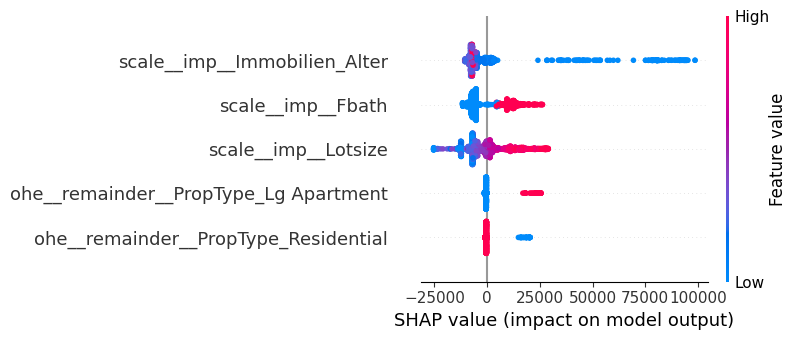

In [253]:
shap.summary_plot(
    shap_values=shap_values_test_3,
    features=transformed_test_3,
    feature_names=transformed_test_3.columns,
)

### SHAP Bar Plot
Mean absolute value der SHAP Werte pro Feature

Wir brauchen für den Bar Plot nicht die rohen Shap Values, sondern ein Explanation Objekt.

In [254]:
explanation_3 = explainer_3(X=transformed_test_3)

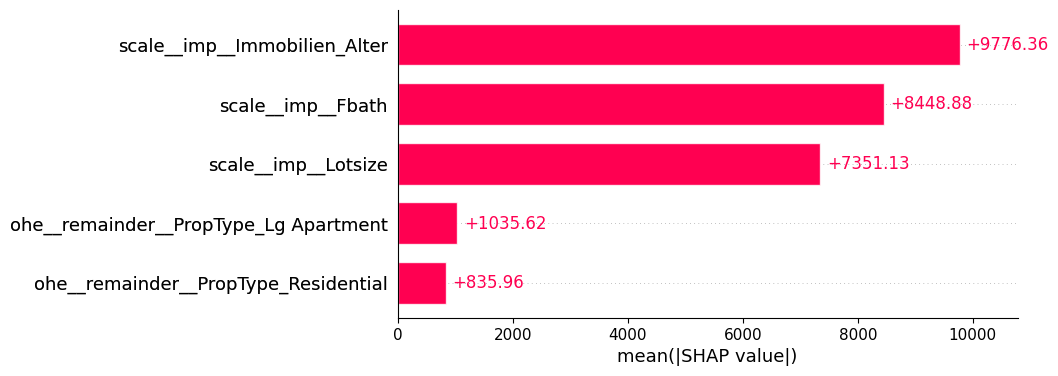

In [255]:
shap.plots.bar(shap_values=explanation_3)

## Shap Deep Dive

Ist der Durchschnitt in den SHAP Werten je Feature ca. bei null?

In [288]:
pd.DataFrame(shap_values_test_3, columns=transformed_test_3.columns)

,scale__imp__Fbath,scale__imp__Immobilien_Alter,scale__imp__Lotsize,ohe__remainder__PropType_Lg Apartment,ohe__remainder__PropType_Residential
0,4797.633910,-5116.970756,22427.955672,25338.056118,20371.636789
1,-6953.914082,-7638.345837,-2379.553891,-513.958231,-436.119080
2,9397.477505,-5568.953300,-12228.311329,-457.155885,-394.757068
3,6432.358549,94589.282802,16552.136443,-361.467638,-266.923936
4,12547.577369,-5797.801382,-1508.179167,-421.066614,-363.318275
...,...,...,...,...,...
1834,-5959.183025,-7412.579056,-5789.061232,-519.602870,-440.283133
1835,-6874.465163,-7018.222584,-4476.212082,-516.412477,-438.375491
1836,-5226.261113,-7089.345022,-6781.466341,-521.376607,-442.267677
1837,12626.017039,-5136.309823,2571.245304,-403.938228,-334.453398


In [289]:
import pandas as pd

shap_values_test_feat_sums = pd.DataFrame(
    shap_values_test_3, columns=transformed_test_3.columns
).sum()
shap_values_test_feat_sums

scale__imp__Fbath                        292418.871851
scale__imp__Immobilien_Alter            -335079.799190
scale__imp__Lotsize                      160477.341496
ohe__remainder__PropType_Lg Apartment    -52993.733582
ohe__remainder__PropType_Residential     -23690.359360
dtype: float64

Pro Feature, nein! Über alle hinweg?

In [290]:
shap_values_test_feat_sums.sum()

41132.32121542315

Nah dran. Aber es handelt sich auch um die Testdaten. Dennoch ist der Ausgangspunkt, also der Expected Wert von ~1974.2 , gut gewählt! Zur Einordnung noch der Absolutwert an Shap Values.

In [291]:
shap_values_test_feat_sums.abs().sum()

864660.1054792051

In [292]:
transformed_train_3 = pipeline_3[:-1].transform(X=train_data[cols_subset_2])
transformed_train_3.shape

(7353, 5)

In [293]:
shap_values_train_3 = explainer_3.shap_values(X=transformed_train_3)
shap_values_train_3.shape

(7353, 5)

In [294]:
shap_values_train_feat_sums = pd.DataFrame(
    shap_values_train_3, columns=transformed_train_3.columns
).sum()
shap_values_train_feat_sums

scale__imp__Fbath                        1.429509e+06
scale__imp__Immobilien_Alter            -1.265909e+06
scale__imp__Lotsize                      9.335380e+04
ohe__remainder__PropType_Lg Apartment   -2.773240e+05
ohe__remainder__PropType_Residential    -1.483976e+05
dtype: float64

In [295]:
shap_values_train_feat_sums.sum()

-168767.98723830964

In [296]:
shap_values_train_feat_sums.abs().sum()

3214492.91879573

## SHAP einzelne Beispiele

### Bar Plot

In [297]:
len(transformed_test_3)

1839

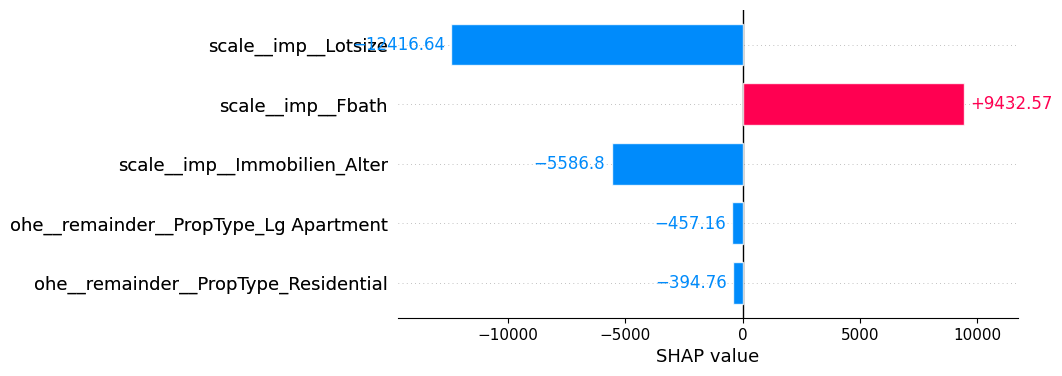

In [300]:
shap.plots.bar(shap_values=explanation_3[200]) # 

### Force Plot

In [301]:
# load JS visualization code to notebook
shap.initjs()

In [303]:
ix = 200  # <- einfach mal ein paar Beispiele angucken!

shap.force_plot(
    base_value=explainer_3.expected_value,
    shap_values=shap_values_test_3[ix, :],
    features=transformed_test_3.columns,
    figsize=(25, 3),
    # matplotlib=True,
)

In [306]:
shap.force_plot(
    base_value=explainer_3.expected_value,
    shap_values=shap_values_test_3[1800, :],#
    features=transformed_test_3.columns,
    figsize=(25, 3),
    # matplotlib=True,
)